In [108]:
class Gene:
    def __init__(self,name,longtitude,latitude):
        self.name = name
        self.longtitude = longtitude
        self.latitude = latitude
def read_csv(file):
    with open(file,'r') as f:
        data = f.readlines()[1:]
        city_list = []
        for line in data:
            line = line.strip().split(',')
            city_list.append(Gene(line[0],float(line[1]),float(line[2])))
        return city_list
cities = read_csv('Data set CSV.csv')
print(cities)
for city in cities:
    print(city.name,city.longtitude,city.latitude)

class Chromosome:
    def __init__(self,genes):
        self.genes = genes
        self.fitness = 0
        self.cost = 0
    def __str__(self):
        return ' '.join([gene.name for gene in self.genes])


[<__main__.Gene object at 0x0000025E23E42550>, <__main__.Gene object at 0x0000025E134C8890>, <__main__.Gene object at 0x0000025E23CCE6D0>, <__main__.Gene object at 0x0000025E23CCDB90>, <__main__.Gene object at 0x0000025E23CCE7D0>, <__main__.Gene object at 0x0000025E23CCD790>, <__main__.Gene object at 0x0000025E23CCCED0>, <__main__.Gene object at 0x0000025E23CCEFD0>, <__main__.Gene object at 0x0000025E23E36150>, <__main__.Gene object at 0x0000025E23E36710>, <__main__.Gene object at 0x0000025E23E358D0>, <__main__.Gene object at 0x0000025E23E35A10>, <__main__.Gene object at 0x0000025E23E37950>, <__main__.Gene object at 0x0000025E23E36E10>, <__main__.Gene object at 0x0000025E23E36990>]
1 5.5e-08 9.86e-09
2 -28.8733 -7.98e-08
3 -79.2916 -21.4033
4 -14.6577 -43.3896
5 -64.7473 21.8982
6 -29.0585 -43.2167
7 -72.0785 0.181581
8 -36.0366 -21.6135
9 -50.4808 7.37447
10 -50.5859 -21.5882
11 -0.135819 -28.7293
12 -65.0866 -36.0625
13 -21.4983 7.31942
14 -57.5687 -43.2506
15 -43.07 14.5548


10 14 12 3 7 5 15 9 8 2 13 1 11 4 6


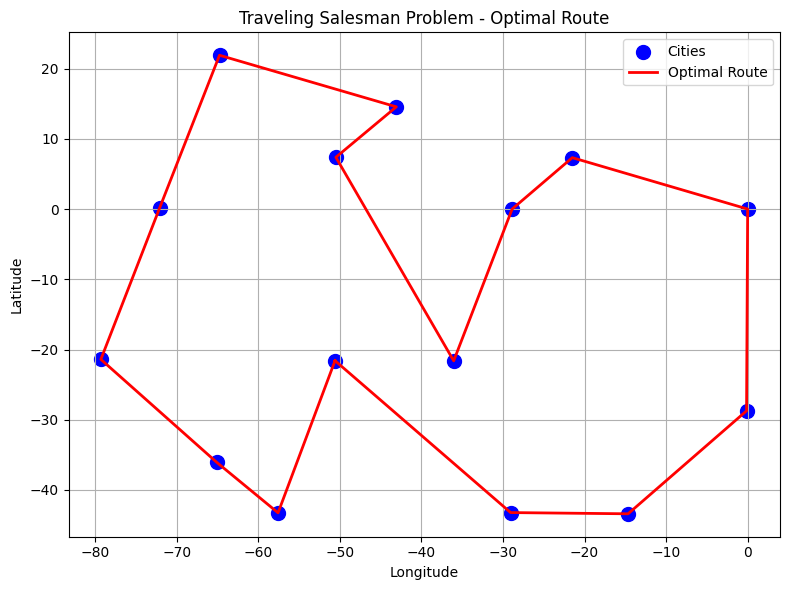

In [109]:
import random
import matplotlib.pyplot as plt

city_list=cities.copy()
def generate_chromosome(city_list):
    genes = random.sample(city_list, len(city_list))
    return Chromosome(genes)

def calculate_distance(city1, city2):
    longitude_diff = city1.longtitude - city2.longtitude
    latitude_diff=city1.latitude - city2.latitude
    return ((longitude_diff)**2 + (latitude_diff)**2)**0.5

def evaluate_fitness(chromosome):
    total_distance = 0
    genes = chromosome.genes
    for i in range(len(genes) - 1):
        total_distance += calculate_distance(chromosome.genes[i], chromosome.genes[i + 1])
    total_distance += calculate_distance(chromosome.genes[-1], chromosome.genes[0])
    chromosome.cost = total_distance
    chromosome.fitness = 1 / total_distance

def elite_chromosomes(population, elitism_percentage):
    population_sorted = sorted(population, key=lambda x: x.fitness, reverse=True)
    elitism_count = int(elitism_percentage * len(population))
    return population_sorted[:elitism_count]

def k_tournament_selection(population, k=2):
    tournament = random.sample(population, k)
    winner = max(tournament, key=lambda x: x.fitness)
    return winner

def partially_mapped_crossover(parent1, parent2):
    length = len(parent1.genes)
    crossover_point1 = random.randint(0, length - 1)
    crossover_point2 = random.randint(crossover_point1 + 1, length)
    
    offspring1 = parent1.genes[:]
    offspring2 = parent2.genes[:]

    offspring1[crossover_point1:crossover_point2] = parent2.genes[crossover_point1:crossover_point2]
    offspring2[crossover_point1:crossover_point2] = parent1.genes[crossover_point1:crossover_point2]

    for i in range(length):
        if i < crossover_point1 or i >= crossover_point2:
            while offspring1[i] in offspring1[crossover_point1:crossover_point2]:
                idx = offspring1.index(offspring1[i], crossover_point1, crossover_point2)
                offspring1[i] = offspring2[idx]
            
            while offspring2[i] in offspring2[crossover_point1:crossover_point2]:
                idx = offspring2.index(offspring2[i], crossover_point1, crossover_point2)
                offspring2[i] = offspring1[idx]

    return Chromosome(offspring1), Chromosome(offspring2)

def perform_crossover(population, elitism_percentage, crossover_rate):
    elite = elite_chromosomes(population, elitism_percentage)
    new_generation = elite[:]
    
    crossover_count = (len(population) - len(elite)) // 2
    for _ in range(crossover_count):
        parent1 = k_tournament_selection(population)
        parent2 = k_tournament_selection(population)
        
        if random.random() < crossover_rate:
            offspring1, offspring2 = partially_mapped_crossover(parent1, parent2)
            evaluate_fitness(offspring1)
            evaluate_fitness(offspring2)
            new_generation.append(offspring1)
            new_generation.append(offspring2)
        else:
            new_generation.append(parent1)
            new_generation.append(parent2)

    return new_generation

def swap_mutation(chromosome):
    genes = chromosome.genes
    idx1, idx2 = random.sample(range(len(genes)), 2)
    genes[idx1], genes[idx2] = genes[idx2], genes[idx1]
    return chromosome

def perform_mutation(population, mutation_rate):
    new_population = []
    for parent in population:
        if random.random() < mutation_rate:
            mutated_parent = swap_mutation(parent)
            evaluate_fitness(mutated_parent)
            new_population.append(mutated_parent)
        else:
            new_population.append(parent)
    return new_population

def evolve_population(city_list, population_size=50, generations_count=250, elitism_percentage=0.02, mutation_rate=0.1, crossover_rate=0.6):
    population = [generate_chromosome(city_list) for _ in range(population_size)]
    for chromosome in population:
        evaluate_fitness(chromosome)
    
    for _ in range(generations_count):
        population = perform_crossover(population, elitism_percentage, crossover_rate)
        population = perform_mutation(population, mutation_rate)

    return population


final_population = evolve_population(city_list)
best_chromosome = max(final_population, key=lambda x: x.fitness)
print(best_chromosome)

#draw the graph
def plot_cities_and_route(city_list, best_chromosome):
    cities_x=[]
    cities_y=[]
    for city in city_list:
        long=city.longtitude
        cities_x.append(long)
        lang=city.latitude
        cities_y.append(lang)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(cities_x, cities_y, color='blue', s=100, label='Cities')

   
    best_genes = best_chromosome.genes
    best_route_x = [best_genes[i].longtitude for i in range(len(best_genes))]
    best_route_y = [best_genes[i].latitude for i in range(len(best_genes))]
    best_route_x.append(best_genes[0].longtitude)  
    best_route_y.append(best_genes[0].latitude)
    plt.plot(best_route_x, best_route_y, color='red', linewidth=2, linestyle='-', label='Optimal Route')

    plt.title('Traveling Salesman Problem - Optimal Route')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()

    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cities_and_route(city_list, best_chromosome)